# Solar Data Discovery/ TOGO: Week 0 Challenge 
BENIN: Data Profiling, Cleaning, and Exploratory Data Analysis (EDA)

1. importing  Necessary packages


In [9]:
# import necessary Packages ...
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

2. Load dataset ... Togo

In [10]:
file_path = "E:/Tenx/data/togo-dapaong_qc.csv"
df = pd.read_csv(file_path)

# Show first few rows
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,outlier_flag
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN,False
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN,False
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN,False
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN,False
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN,False


3. Statistics Summary & Missing Values analysis

In [11]:
# Summary stats
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,0.0
mean,223.859675,147.975931,112.781249,219.380751,213.028150,27.727474,55.182807,2.312185,3.154247,0.548049,162.129322,10.491499,975.893919,0.000529,0.000952,32.312313,33.378512,NaN
std,317.306277,247.683690,151.571744,311.854841,302.625802,4.757337,28.698318,1.377997,1.762192,0.252824,92.028704,5.915056,2.147358,0.022988,0.018621,10.957090,12.718462,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.800000,1.400000,1.900000,0.400000,74.700000,6.800000,975.000000,0.000000,0.000000,23.800000,23.600000,NaN
50%,0.500000,0.000000,1.500000,2.800000,2.800000,27.200000,59.400000,2.200000,2.900000,0.500000,200.200000,10.700000,976.000000,0.000000,0.000000,28.200000,28.200000,NaN
75%,423.200000,237.900000,211.600000,404.100000,393.100000,31.000000,81.000000,3.200000,4.100000,0.700000,233.700000,14.000000,977.000000,0.000000,0.000000,40.300000,42.600000,NaN
max,1198.000000,904.100000,586.000000,1171.200000,1143.000000,41.400000,99.800000,6.700000,8.800000,2.700000,360.000000,86.900000,983.000000,1.000000,1.800000,70.400000,94.600000,NaN


In [12]:
# Missing values report
df.isna().sum().sort_values(ascending=False)

Comments         516349
Timestamp             0
DNI                   0
GHI                   0
DHI                   0
ModA                  0
Tamb                  0
ModB                  0
WS                    0
WSgust                0
WSstdev               0
RH                    0
WD                    0
WDstdev               0
Cleaning              0
BP                    0
Precipitation         0
TModA                 0
TModB                 0
outlier_flag          0
dtype: int64

4. Outlier Detection with Z-Scores

In [13]:
from scipy.stats import zscore

key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[key_cols].apply(zscore)

# Flag outliers
outliers = (z_scores.abs() > 3)
df['outlier_flag'] = outliers.any(axis=1)

# Check how many outliers
df['outlier_flag'].value_counts()

# Recommended: Drop outlier rows to create a clean dataset; 
# Since your outliers are less than 2%, and you're preparing this data for EDA and regional comparison:
df_cleaned = df[~df['outlier_flag']].copy()

# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv('E:/Tenx/data/togo-dapaong_qc.csv', index=False)

# Optional: Preview the cleaned data
print("Cleaned dataset shape:", df_cleaned.shape)

df= df_cleaned

Cleaned dataset shape: (513000, 20)


6. Correlation and Scatter Plots

<Axes: >

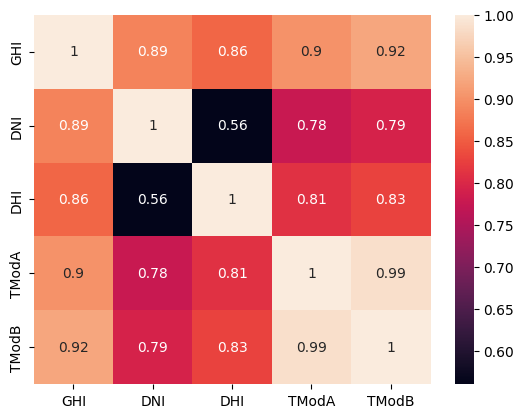

In [14]:

# Heatmap
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True)